# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
print(weather_api_key)

46d479ed96c458e8e6f198f0ee9873d7


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [6]:
print(cities)

['port alfred', 'san quintin', 'kavaratti', 'lakes entrance', 'busselton', 'nome', 'surt', 'saint-francois', 'east london', 'mataura', 'kartaly', 'launceston', 'illoqqortoormiut', 'vaitupu', 'villa carlos paz', 'rikitea', 'dikson', 'skjervoy', 'ushuaia', 'yellowknife', 'kyshtovka', 'deputatskiy', 'atuona', 'butaritari', 'bethel', 'christchurch', 'albany', 'chulman', 'vaini', 'atasu', 'lebu', 'hobart', 'thompson', 'grand river south east', 'hofn', 'chernyshevskiy', 'tuktoyaktuk', 'meulaboh', 'cape town', 'avarua', 'port elizabeth', 'sao felix do xingu', 'mys shmidta', 'kabanjahe', 'kapaa', 'marcona', 'phitsanulok', 'asfi', 'saint-philippe', 'cherskiy', 'lorengau', 'klaksvik', 'attawapiskat', 'salinopolis', 'buala', 'saskylakh', 'kainan', 'castro', 'bluff', 'camacha', 'zaysan', 'myitkyina', 'carnarvon', 'mount gambier', 'vardo', 'mar del plata', 'sisimiut', 'taolanaro', 'mizan teferi', 'harper', 'grand gaube', 'sistranda', 'karkaralinsk', 'barentsburg', 'puerto ayora', 'tasiilaq', 'longy

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=46d479ed96c458e8e6f198f0ee9873d7&units=metric&q=


In [8]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=46d479ed96c458e8e6f198f0ee9873d7&units=metric&q=


In [9]:
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
counter = 0
record_counter = 0
setcount = 1


for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(query_url + city).json()
        #pprint(weather_response)
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City not found: " + city)
        
        
print(len(weather_response))

processing Record 1 of Set 1 | port alfred
processing Record 2 of Set 1 | san quintin
processing Record 3 of Set 1 | kavaratti
processing Record 4 of Set 1 | lakes entrance
processing Record 5 of Set 1 | busselton
processing Record 6 of Set 1 | nome
processing Record 7 of Set 1 | surt
processing Record 8 of Set 1 | saint-francois
processing Record 9 of Set 1 | east london
processing Record 10 of Set 1 | mataura
processing Record 11 of Set 1 | kartaly
processing Record 12 of Set 1 | launceston
processing Record 13 of Set 1 | illoqqortoormiut
City not found: illoqqortoormiut
processing Record 14 of Set 1 | vaitupu
City not found: vaitupu
processing Record 15 of Set 1 | villa carlos paz
processing Record 16 of Set 1 | rikitea
processing Record 17 of Set 1 | dikson
processing Record 18 of Set 1 | skjervoy
processing Record 19 of Set 1 | ushuaia
processing Record 20 of Set 1 | yellowknife
processing Record 21 of Set 1 | kyshtovka
processing Record 22 of Set 1 | deputatskiy
processing Record

processing Record 38 of Set 4 | umzimvubu
City not found: umzimvubu
processing Record 39 of Set 4 | cabo san lucas
processing Record 40 of Set 4 | tessalit
processing Record 41 of Set 4 | bambous virieux
processing Record 42 of Set 4 | lapua
processing Record 43 of Set 4 | barcelos
processing Record 44 of Set 4 | fare
processing Record 45 of Set 4 | pacifica
processing Record 46 of Set 4 | heide
processing Record 47 of Set 4 | arona
processing Record 48 of Set 4 | los llanos de aridane
processing Record 49 of Set 4 | ikalamavony
processing Record 50 of Set 4 | broome
5
0
200
processing Record 1 of Set 5 | faanui
processing Record 2 of Set 5 | omboue
processing Record 3 of Set 5 | antofagasta
processing Record 4 of Set 5 | tecoanapa
processing Record 5 of Set 5 | noshiro
processing Record 6 of Set 5 | artvin
processing Record 7 of Set 5 | karamea
City not found: karamea
processing Record 8 of Set 5 | vila franca do campo
processing Record 9 of Set 5 | mujiayingzi
processing Record 10 of

processing Record 27 of Set 8 | jutai
processing Record 28 of Set 8 | ilulissat
processing Record 29 of Set 8 | sivas
processing Record 30 of Set 8 | buhe
processing Record 31 of Set 8 | tignere
processing Record 32 of Set 8 | paita
processing Record 33 of Set 8 | werda
processing Record 34 of Set 8 | kununurra
processing Record 35 of Set 8 | viedma
processing Record 36 of Set 8 | robe
processing Record 37 of Set 8 | carutapera
processing Record 38 of Set 8 | gat
processing Record 39 of Set 8 | jabiru
City not found: jabiru
processing Record 40 of Set 8 | qui nhon
processing Record 41 of Set 8 | guerrero negro
processing Record 42 of Set 8 | minab
processing Record 43 of Set 8 | qaanaaq
processing Record 44 of Set 8 | bonthe
processing Record 45 of Set 8 | san vicente de canete
processing Record 46 of Set 8 | nouadhibou
processing Record 47 of Set 8 | quelimane
processing Record 48 of Set 8 | nyrob
processing Record 49 of Set 8 | hay river
processing Record 50 of Set 8 | eyl
9
0
400
pr

processing Record 18 of Set 12 | neftcala
processing Record 19 of Set 12 | saint marys
processing Record 20 of Set 12 | careiro da varzea
processing Record 21 of Set 12 | atar
processing Record 22 of Set 12 | huainan
processing Record 23 of Set 12 | te anau
processing Record 24 of Set 12 | erice
processing Record 25 of Set 12 | caravelas
processing Record 26 of Set 12 | oktyabrskiy
processing Record 27 of Set 12 | safaqis
City not found: safaqis
processing Record 28 of Set 12 | azangaro
processing Record 29 of Set 12 | korla
processing Record 30 of Set 12 | vieques
processing Record 31 of Set 12 | katha
City not found: katha
processing Record 32 of Set 12 | kuito
processing Record 33 of Set 12 | fort collins
processing Record 34 of Set 12 | namibe
processing Record 35 of Set 12 | gravelbourg
processing Record 36 of Set 12 | belaya gora
processing Record 37 of Set 12 | roma
processing Record 38 of Set 12 | saint-georges
processing Record 39 of Set 12 | nhulunbuy
processing Record 40 of 

In [10]:
print(len(city_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(windspeed_list))

579
579
579
579
579
579
579


In [11]:
weather_dict = {"city":city_list,
                "lat":lat_list,
                "lng":lng_list,
                "max_temp":max_temp_list,
                "humidity":humidity_list,
                "cloudiness":cloudiness_list,
                "windspeed":windspeed_list
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,windspeed
0,Port Alfred,-33.5906,26.8910,18.89,95,68,2.24
1,San Quintín,30.4833,-115.9500,12.53,75,4,3.01
2,Kavaratti,10.5669,72.6420,28.36,71,47,3.14
3,Lakes Entrance,-37.8811,147.9810,21.67,71,75,1.79
4,Busselton,-33.6500,115.3333,23.33,83,100,0.89


In [20]:
# Export the City_Data into a csv
weather_df.to_csv("output_data/cities.csv")
weather_df

,city,lat,lng,max_temp,humidity,cloudiness,windspeed
0,Port Alfred,-33.5906,26.8910,18.89,95,68,2.24
1,San Quintín,30.4833,-115.9500,12.53,75,4,3.01
2,Kavaratti,10.5669,72.6420,28.36,71,47,3.14
3,Lakes Entrance,-37.8811,147.9810,21.67,71,75,1.79
4,Busselton,-33.6500,115.3333,23.33,83,100,0.89
...,...,...,...,...,...,...,...
574,Mayumba,-3.4320,10.6554,26.80,82,98,2.32
575,Waipawa,-41.4122,175.5153,16.67,67,20,7.72
576,Yashalta,46.3395,42.2762,-2.88,79,99,6.48
577,Entre Rios,-11.9419,-38.0844,22.08,97,94,1.15


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#check if there are any cities with >100% humidity
test_stats = weather_df["humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_stats

# weather_df["humidity"].value_counts()

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    579.000000
mean      72.459413
std       19.998088
min       13.000000
25%       62.000000
50%       76.000000
75%       88.000000
max      100.000000
Name: humidity, dtype: float64

In [31]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

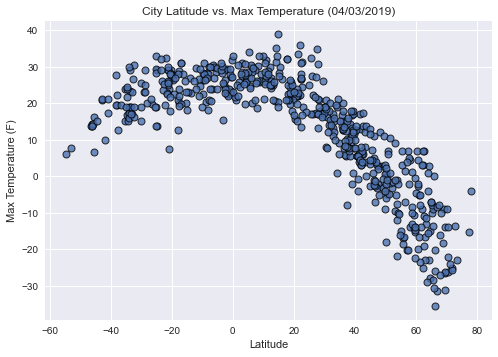

In [33]:
plt.scatter(weather_df['lat'], weather_df['max_temp'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/03/2019)")
plt.savefig("Max_temp.png")

## Latitude vs. Humidity Plot

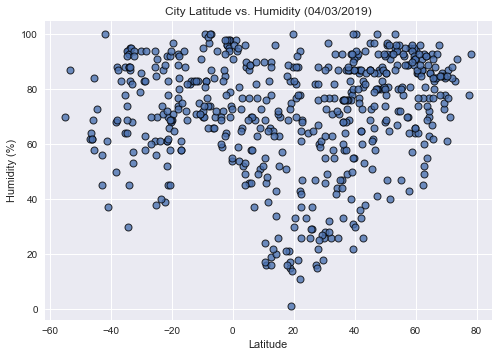

In [34]:
plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/03/2019)")
plt.savefig("Humidity.png")

## Latitude vs. Cloudiness Plot

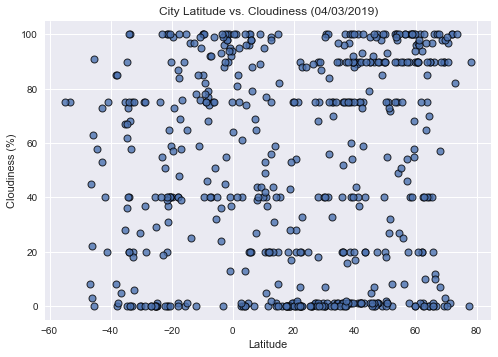

In [35]:
plt.scatter(weather_df['lat'], weather_df['cloudiness'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/03/2019)")
plt.savefig("Cloudiness.png")

## Latitude vs. Wind Speed Plot

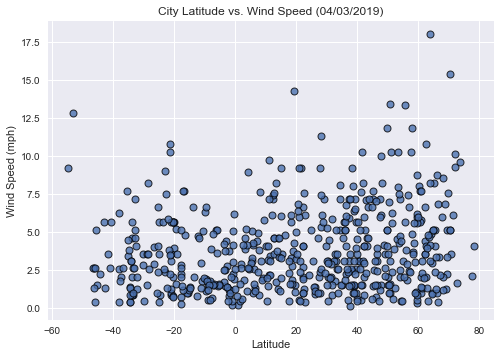

In [36]:
plt.scatter(weather_df['lat'], weather_df['windspeed'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/03/2019)")
plt.savefig("Wind_Speed.png")

## Linear Regression

In [24]:
 # Create Northern and Southern Hemisphere DataFrames
L=0
Northern = weather_df.query(f"lat >= {L}")
Southern = weather_df.query(f"lat <= {L}")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.8041124411427355


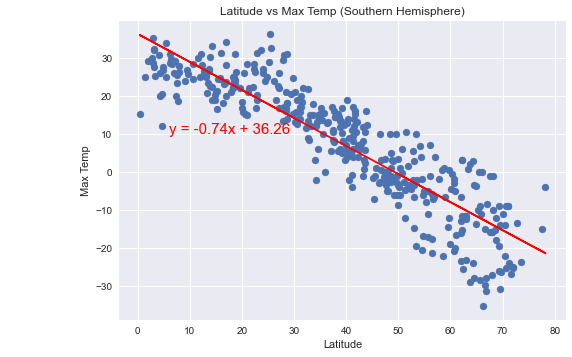

<Figure size 576x396 with 0 Axes>

In [40]:
x_values=Northern['lat']
y_values=Northern['max_temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print on graph
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

# Label plot
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use('seaborn')

# Print r square value

print(f"The coefficient of determination(R^2) is: {rvalue**2}")


#Print on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

# Show plot
plt.show()

plt.savefig("NH_Max_Temp_Lat_Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.2465682225639494


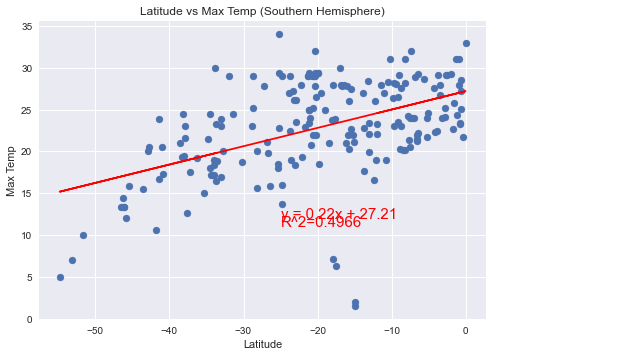

<Figure size 576x396 with 0 Axes>

In [39]:
x_values=Southern['lat']
y_values=Southern['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use('seaborn')

#Print on graph

R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("SH_Max_Temp_Lat_Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.12412666510157874


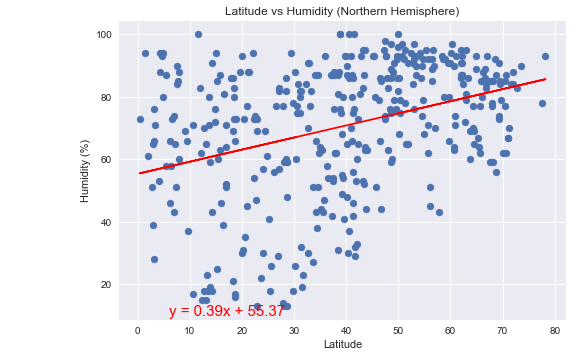

<Figure size 576x396 with 0 Axes>

In [34]:
x_values=Northern['lat']
y_values=Northern['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Northern Hemisphere)')
plt.style.use('seaborn')

#Print on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("NH_Humidity_Lat_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.1138570321014614


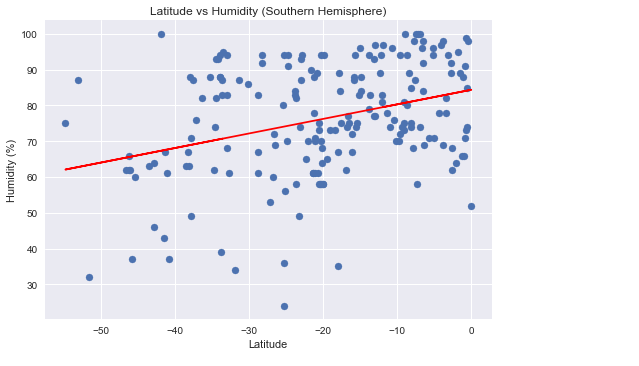

<Figure size 576x396 with 0 Axes>

In [33]:
x_values=Southern['lat']
y_values=Southern['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Southern Hemisphere)')
plt.style.use('seaborn')


# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

#Print on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

# Show plot
plt.show()
plt.savefig("SH_Humidity_Lat_Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.033212471041879466


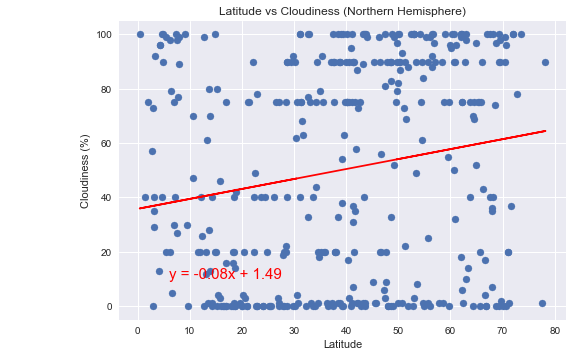

<Figure size 576x396 with 0 Axes>

In [31]:
x_values=Northern['lat']
y_values=Northern['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

#Print on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")

R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

# Show plot
plt.show()
plt.savefig("NH_Cloudiness_Lat_Regression.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.12418779145308169


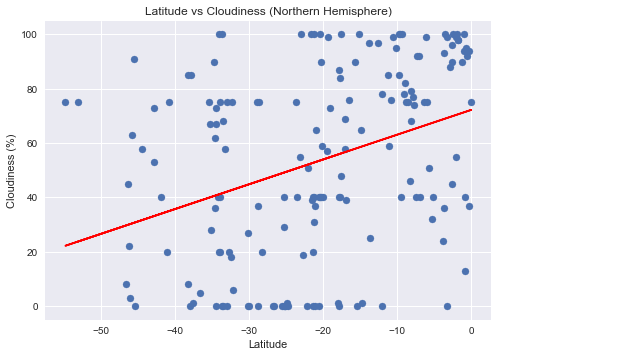

<Figure size 576x396 with 0 Axes>

In [25]:
x_values=Southern['lat']
y_values=Southern['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

#Print on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

# Show plot
plt.show()
plt.savefig("SH_Cloudiness_Lat_Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.025729018502093783


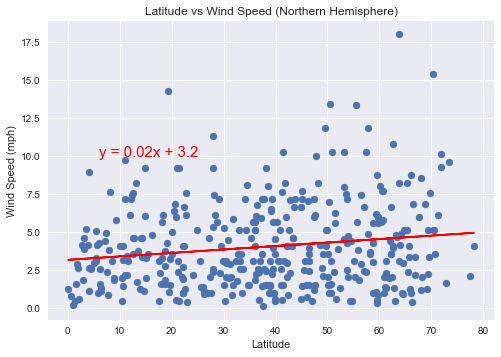

<Figure size 576x396 with 0 Axes>

In [26]:
x_values=Northern['lat']
y_values=Northern['windspeed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

#Print on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

# Show plot
plt.show()
plt.savefig("NH_Wind_Speed_Lat_Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.1497038378080154


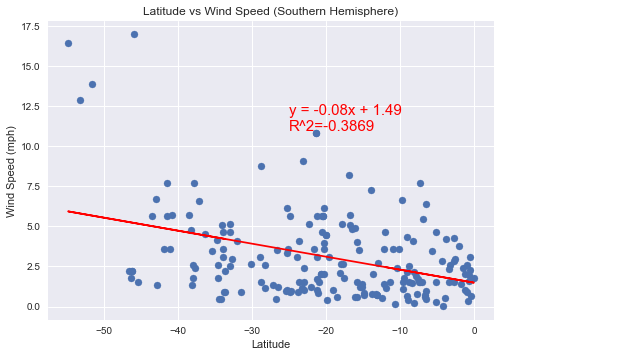

<Figure size 576x396 with 0 Axes>

In [30]:
x_values=Southern['lat']
y_values=Southern['windspeed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

#Print on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

# Show plot
plt.show()
plt.savefig("SH_Wind_Speed_Lat_Regression.png")
